<a href="https://colab.research.google.com/github/nabinyd/60-Days-of-learning/blob/main/DLPT_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Custom Datasets
# Day 23

  ##  0. Importing PyToch and setting up device-agnostic code
  

In [8]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [9]:
#  Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

## 1. Get data

our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing)

Our dataset starts with classes of food and only 10% of the images. (~75 training, 25  testing).

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.


In [10]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizaa_steak_sushi"

# If the image folder doesnt exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory a;ready exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

  # Downlaod pizza, steak and sushi data
  with open(data_path / "pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downlooading pizza, steak, sushi data...")
    f.write(request.content)

data/pizaa_steak_sushi does not exist, creating one...
Downlooading pizza, steak, sushi data...


In [11]:
# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data..")
  zip_ref.extractall(image_path)

Unzipping pizza, steak and sushi data..


## 2. Becoming one with the data (data preparation and data exploration)

In [14]:
import os
def walK_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

In [16]:
walK_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizaa_steak_sushi'. 
There are 3 directories and 0 images in 'data/pizaa_steak_sushi/train'. 
There are 0 directories and 75 images in 'data/pizaa_steak_sushi/train/steak'. 
There are 0 directories and 78 images in 'data/pizaa_steak_sushi/train/pizza'. 
There are 0 directories and 72 images in 'data/pizaa_steak_sushi/train/sushi'. 
There are 3 directories and 0 images in 'data/pizaa_steak_sushi/test'. 
There are 0 directories and 19 images in 'data/pizaa_steak_sushi/test/steak'. 
There are 0 directories and 25 images in 'data/pizaa_steak_sushi/test/pizza'. 
There are 0 directories and 31 images in 'data/pizaa_steak_sushi/test/sushi'. 


In [17]:
#  Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"


train_dir, test_dir

(PosixPath('data/pizaa_steak_sushi/train'),
 PosixPath('data/pizaa_steak_sushi/test'))

 ### 2.1 Visualizing and image

 Let's write some code to:
 1. Get all of the ransom paths
 2. Pick a random image path using Python's random.choice()
 3. Get the image class name using `pathlib.Path.parent.stem`
 4. Since we're working with images, let's open the image with Python's PIL

 5. We'll then show the image and print metadata

data/pizaa_steak_sushi/train/steak/2087958.jpg
steak
Random image path: data/pizaa_steak_sushi/train/steak/2087958.jpg
Image class: steak
Image height: 512
Image width: 512


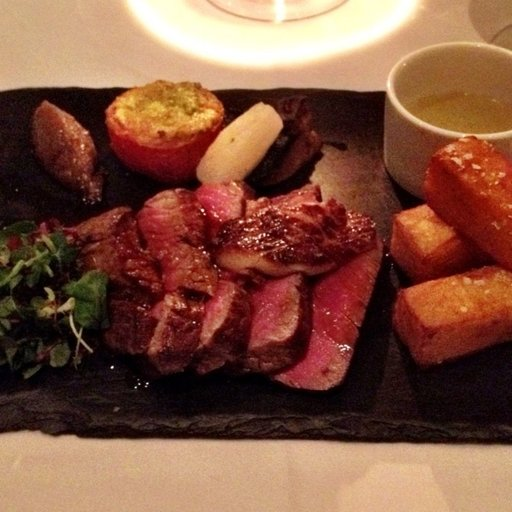

In [25]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class form path name (the image class is the name of the directroy where the image the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img



In [26]:
# image_path_list

2.0

(-0.5, 511.5, 511.5, -0.5)

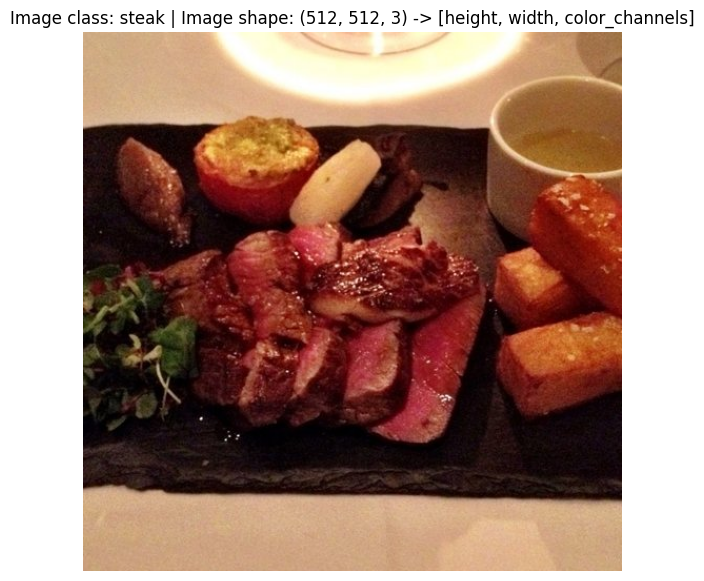

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)